<h1 style="color: red;text-align: center;">Analyse Exploratoire des Données "EDA" </h1>



In [1]:
#Importer biblios
import os 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<h1 style="color: blue;">Reading DataSet Restaurant_Ratings</h1>


In [5]:
consumer_preferences = pd.read_csv("consumer_preferences.csv")
consumers = pd.read_csv("consumers.csv")
ratings = pd.read_csv("ratings.csv")
restaurant_cuisines = pd.read_csv("restaurant_cuisines.csv")
restaurants = pd.read_csv("restaurants.csv")
data_dictionary = pd.read_csv("Data Dictionary/data_dictionary.csv")


<h1 style="color: blue;">Data understanding & Exploration des données </h1>

In [6]:
consumer_preferences.head()

,Consumer_ID,Preferred_Cuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast


In [7]:
consumers.head()

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
0,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,Independent,23,Student,Medium
1,U1002,San Luis Potosi,San Luis Potosi,Mexico,22.150087,-100.983325,No,Abstemious,Public,Single,Independent,22,Student,Low
2,U1003,San Luis Potosi,San Luis Potosi,Mexico,22.119847,-100.946527,No,Social Drinker,Public,Single,Independent,23,Student,Low
3,U1004,Cuernavaca,Morelos,Mexico,18.867000,-99.183000,No,Abstemious,Public,Single,Independent,72,Employed,Medium
4,U1005,San Luis Potosi,San Luis Potosi,Mexico,22.183477,-100.959891,No,Abstemious,Public,Single,Independent,20,Student,Medium


In [8]:
ratings.head()

,Consumer_ID,Restaurant_ID,Overall_Rating,Food_Rating,Service_Rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [9]:
restaurant_cuisines.head()

,Restaurant_ID,Cuisine
0,132560,Regional
1,132572,Cafeteria
2,132583,American
3,132584,Mexican
4,132594,Mexican


In [10]:
restaurants.head()

,Restaurant_ID,Name,City,State,Country,Zip_Code,Latitude,Longitude,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking
0,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,Low,No,Open,Public
1,132561,Cafe Ambar,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.726819,-99.126506,NaN,No,Low,No,Closed,NaN
2,132564,Church's,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.730925,-99.145185,NaN,No,Low,No,Closed,NaN
3,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,NaN,22.141647,-100.992712,NaN,No,Low,No,Closed,Yes
4,132583,McDonalds Centro,Cuernavaca,Morelos,Mexico,62000.0,18.922290,-99.234332,NaN,No,Low,Yes,Closed,NaN


In [11]:
data_dictionary

,Table,Field,Description
0,Consumers,Consumer_ID,Unique identifier for each consumer
1,NaN,City,City where the consumer lives
2,NaN,State,State where the consumer lives
3,NaN,Country,Country where the consumer lives
4,NaN,Latitude,Latitude where the consumer lives
5,NaN,Longitude,Longitude where the consumer lives
6,NaN,Smoker,Whether the consumer smokes or not
7,NaN,Drink_Level,"Whether the consumer is an abstemious, causal,..."
8,NaN,Transportation_Method,"Whether the consumer transports on foot, by pu..."
9,NaN,Marital_Status,The consumer's marital status (single or married)


 <h1 style="color: blue;">Data Preparation </h1>

Suppression des doublons 

In [24]:
consumer_preferences.drop_duplicates(inplace=True)
consumers.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)
restaurant_cuisines.drop_duplicates(inplace=True)
restaurants.drop_duplicates(inplace=True)

Vérification des types de données

In [14]:
print(consumer_preferences.dtypes)

Consumer_ID          object
Preferred_Cuisine    object
dtype: object


In [15]:
print(consumers.dtypes)

Consumer_ID               object
City                      object
State                     object
Country                   object
Latitude                 float64
Longitude                float64
Smoker                    object
Drink_Level               object
Transportation_Method     object
Marital_Status            object
Children                  object
Age                        int64
Occupation                object
Budget                    object
dtype: object


In [16]:
print(ratings.dtypes)


Consumer_ID       object
Restaurant_ID      int64
Overall_Rating     int64
Food_Rating        int64
Service_Rating     int64
dtype: object


In [17]:
print(restaurant_cuisines.dtypes)


Restaurant_ID     int64
Cuisine          object
dtype: object


In [18]:
print(restaurants.dtypes)

Restaurant_ID        int64
Name                object
City                object
State               object
Country             object
Zip_Code           float64
Latitude           float64
Longitude          float64
Alcohol_Service     object
Smoking_Allowed     object
Price               object
Franchise           object
Area                object
Parking             object
dtype: object


Vérification des valeurs manquantes

In [19]:
print(consumer_preferences.isnull().sum())

Consumer_ID          0
Preferred_Cuisine    0
dtype: int64


In [20]:
print(consumers.isnull().sum())

Consumer_ID               0
City                      0
State                     0
Country                   0
Latitude                  0
Longitude                 0
Smoker                    3
Drink_Level               0
Transportation_Method     7
Marital_Status            4
Children                 11
Age                       0
Occupation                7
Budget                    7
dtype: int64


In [196]:
print(ratings.isnull().sum())

Consumer_ID       0
Restaurant_ID     0
Overall_Rating    0
Food_Rating       0
Service_Rating    0
dtype: int64


In [198]:
print(restaurant_cuisines.isnull().sum())


Restaurant_ID    0
Cuisine          0
dtype: int64


In [200]:
print(restaurants.isnull().sum())

Restaurant_ID       0
Name                0
City                0
State               0
Country             0
Zip_Code           74
Latitude            0
Longitude           0
Alcohol_Service    87
Smoking_Allowed     0
Price               0
Franchise           0
Area                0
Parking            65
dtype: int64


In [204]:
print("ratings dataframe size:")
print(ratings.shape)

ratings dataframe size:
(1161, 5)


In [207]:
# Filtrer les lignes avec des valeurs manquantes dans le DataFrame consumer-perferences
missing_values_consumer_preferences = consumer_preferences[consumer_preferences.isnull().any(axis=1)]

# Afficher les lignes contenant des valeurs manquantes
print(missing_values_consumer_preferences)


Empty DataFrame
Columns: [Consumer_ID, Preferred_Cuisine]
Index: []


In [21]:
# Filtrer les lignes avec des valeurs manquantes dans le DataFrame des consommateurs
missing_values_consumers = consumers[consumer_preferences.isnull().any(axis=1)]

# Afficher les lignes contenant des valeurs manquantes
print(missing_values_consumers)


Empty DataFrame
Columns: [Consumer_ID, City, State, Country, Latitude, Longitude, Smoker, Drink_Level, Transportation_Method, Marital_Status, Children, Age, Occupation, Budget]
Index: []


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_32284\3270814789.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_values_consumers = consumers[consumer_preferences.isnull().any(axis=1)]


In [22]:
missing_values_ratings = ratings[ratings.isnull().any(axis=1)]

# Afficher les lignes contenant des valeurs manquantes
print(missing_values_ratings)


Empty DataFrame
Columns: [Consumer_ID, Restaurant_ID, Overall_Rating, Food_Rating, Service_Rating]
Index: []


In [23]:
missing_values_restaurant_cuisines = restaurant_cuisines[restaurant_cuisines.isnull().any(axis=1)]

# Afficher les lignes contenant des valeurs manquantes
print(missing_values_restaurant_cuisines)


Empty DataFrame
Columns: [Restaurant_ID, Cuisine]
Index: []


In [217]:
missing_values_restaurant = restaurant[restaurant.isnull().any(axis=1)]

# Afficher les lignes contenant des valeurs manquantes
print(missing_values_restaurant)


Empty DataFrame
Columns: [Restaurant_ID, Cuisine]
Index: []


In [225]:
ratings_clean=ratings.dropna()
ratings_clean.isna().sum()

Consumer_ID       0
Restaurant_ID     0
Overall_Rating    0
Food_Rating       0
Service_Rating    0
dtype: int64

In [233]:
ratings_clean

,Consumer_ID,Restaurant_ID,Overall_Rating,Food_Rating,Service_Rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [263]:
ratings_clean=ratings_clean.nunique()

In [265]:
print("\nUnique values in Ratings:\n",ratings)


Unique values in Ratings:
 3


In [223]:
consumer_preferences = consumer_preferences.nunique()

In [94]:
print("Unique values in Consumer Preferences:\n",consumer_preferences)

Unique values in Consumer Preferences:
 Consumer_ID          138
Preferred_Cuisine    101
dtype: int64


In [243]:
consumers = consumers.nunique()
restaurant_cuisines = restaurant_cuisines.nunique()
restaurants = restaurants.nunique()

In [245]:
print("\nUnique values in Consumers:\n",consumers)
print("-------------")
print("\nUnique values in Restaurant Cuisines:\n",restaurant_cuisines)
print("-------------")
print("\nUnique values in Restaurants:\n",restaurants)


Unique values in Consumers:
 8
-------------

Unique values in Restaurant Cuisines:
 2
-------------

Unique values in Restaurants:
 8


In [249]:
ratings_clean

,Consumer_ID,Restaurant_ID,Overall_Rating,Food_Rating,Service_Rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [251]:
ratings_clean.head()

,Consumer_ID,Restaurant_ID,Overall_Rating,Food_Rating,Service_Rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [255]:
print(ratings_clean.columns)

Index(['Consumer_ID', 'Restaurant_ID', 'Overall_Rating', 'Food_Rating',
       'Service_Rating'],
      dtype='object')


In [118]:
print(restaurants.columns)
print(restaurant_cuisines.columns)


Index(['Restaurant_ID,Name,City,State,Country,Zip_Code,Latitude,Longitude,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking'], dtype='object')
Index(['Restaurant_ID,Cuisine'], dtype='object')


In [134]:
print("Colonnes dans restaurants :", restaurants.columns.tolist())
print("Colonnes dans restaurant_cuisines :", restaurant_cuisines.columns.tolist())


Colonnes dans restaurants : ['Restaurant_ID,Name,City,State,Country,Zip_Code,Latitude,Longitude,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking']
Colonnes dans restaurant_cuisines : ['Restaurant_ID,Cuisine']


In [136]:
restaurants.columns = restaurants.columns.str.strip()
restaurant_cuisines.columns = restaurant_cuisines.columns.str.strip()


In [138]:
print("Colonnes dans restaurants après nettoyage :", restaurants.columns.tolist())
print("Colonnes dans restaurant_cuisines après nettoyage :", restaurant_cuisines.columns.tolist())


Colonnes dans restaurants après nettoyage : ['Restaurant_ID,Name,City,State,Country,Zip_Code,Latitude,Longitude,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking']
Colonnes dans restaurant_cuisines après nettoyage : ['Restaurant_ID,Cuisine']


In [274]:
ratings = pd.read_csv("ratings.csv")
print(type(ratings))  # Cela devrait afficher <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


In [276]:
print(ratings.head())


  Consumer_ID  Restaurant_ID  Overall_Rating  Food_Rating  Service_Rating
0       U1077         135085               2            2               2
1       U1077         135038               2            2               1
2       U1077         132825               2            2               2
3       U1077         135060               1            2               2
4       U1068         135104               1            1               2



 <h1 style="color: blue;">Visualisation graphique du dataset </h1>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


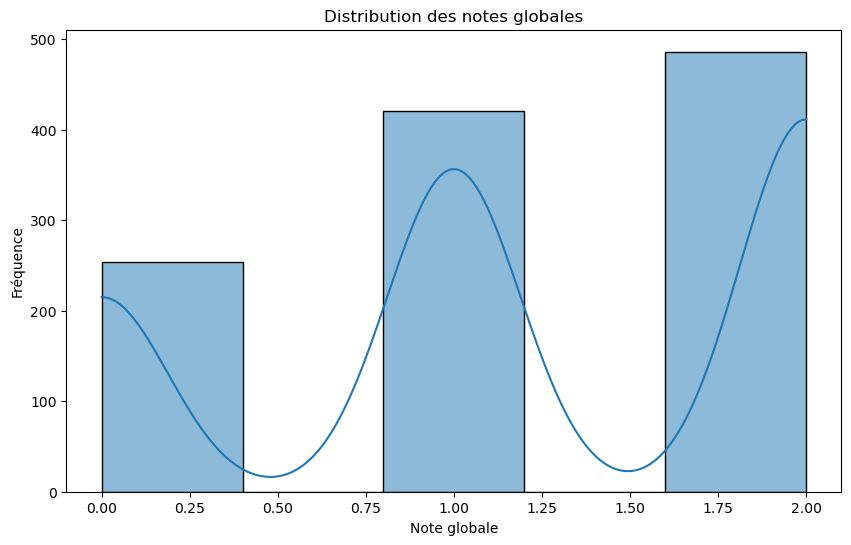

In [26]:
#Visualisation par Histogramme 
plt.figure(figsize=(10, 6))
sns.histplot(ratings['Overall_Rating'], bins=5, kde=True)
plt.title('Distribution des notes globales')
plt.xlabel('Note globale')
plt.ylabel('Fréquence')
plt.show()


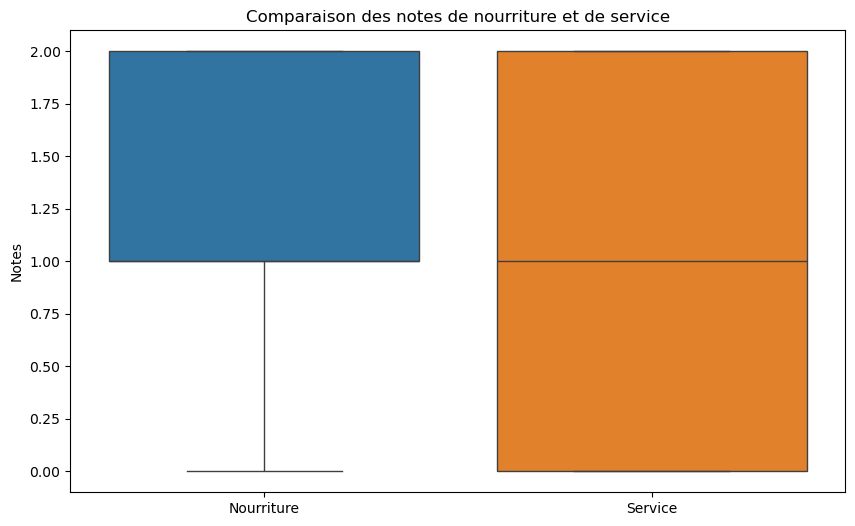

In [289]:
#Boite à moustaches pour la comparaison entre le Food ratting et Service Raitting
plt.figure(figsize=(10, 6))
sns.boxplot(data=ratings[['Food_Rating', 'Service_Rating']])
plt.title('Comparaison des notes de nourriture et de service')
plt.ylabel('Notes')
plt.xticks(ticks=[0, 1], labels=['Nourriture', 'Service'])
plt.show()



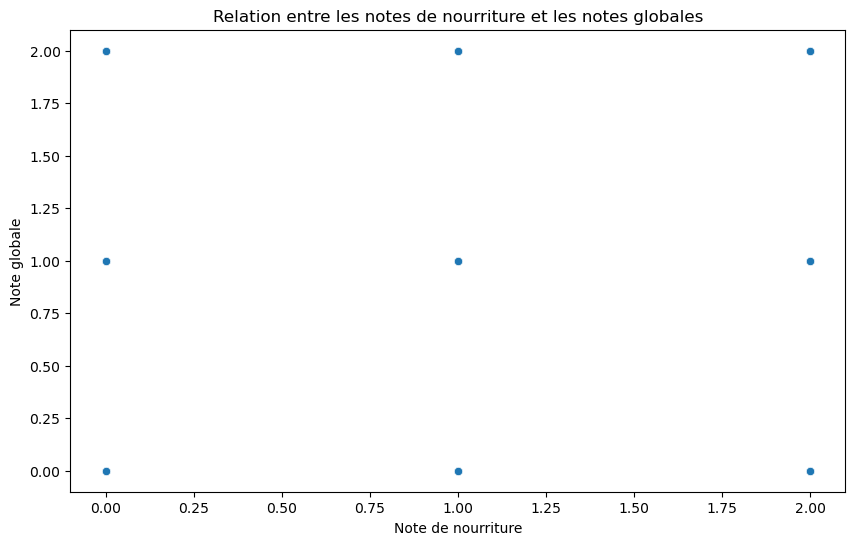

In [291]:
#Nuage de points entre overall_ratting et Food-rating 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Food_Rating', y='Overall_Rating', data=ratings)
plt.title('Relation entre les notes de nourriture et les notes globales')
plt.xlabel('Note de nourriture')
plt.ylabel('Note globale')
plt.show()


C:\Users\NOURA\anaconda3\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


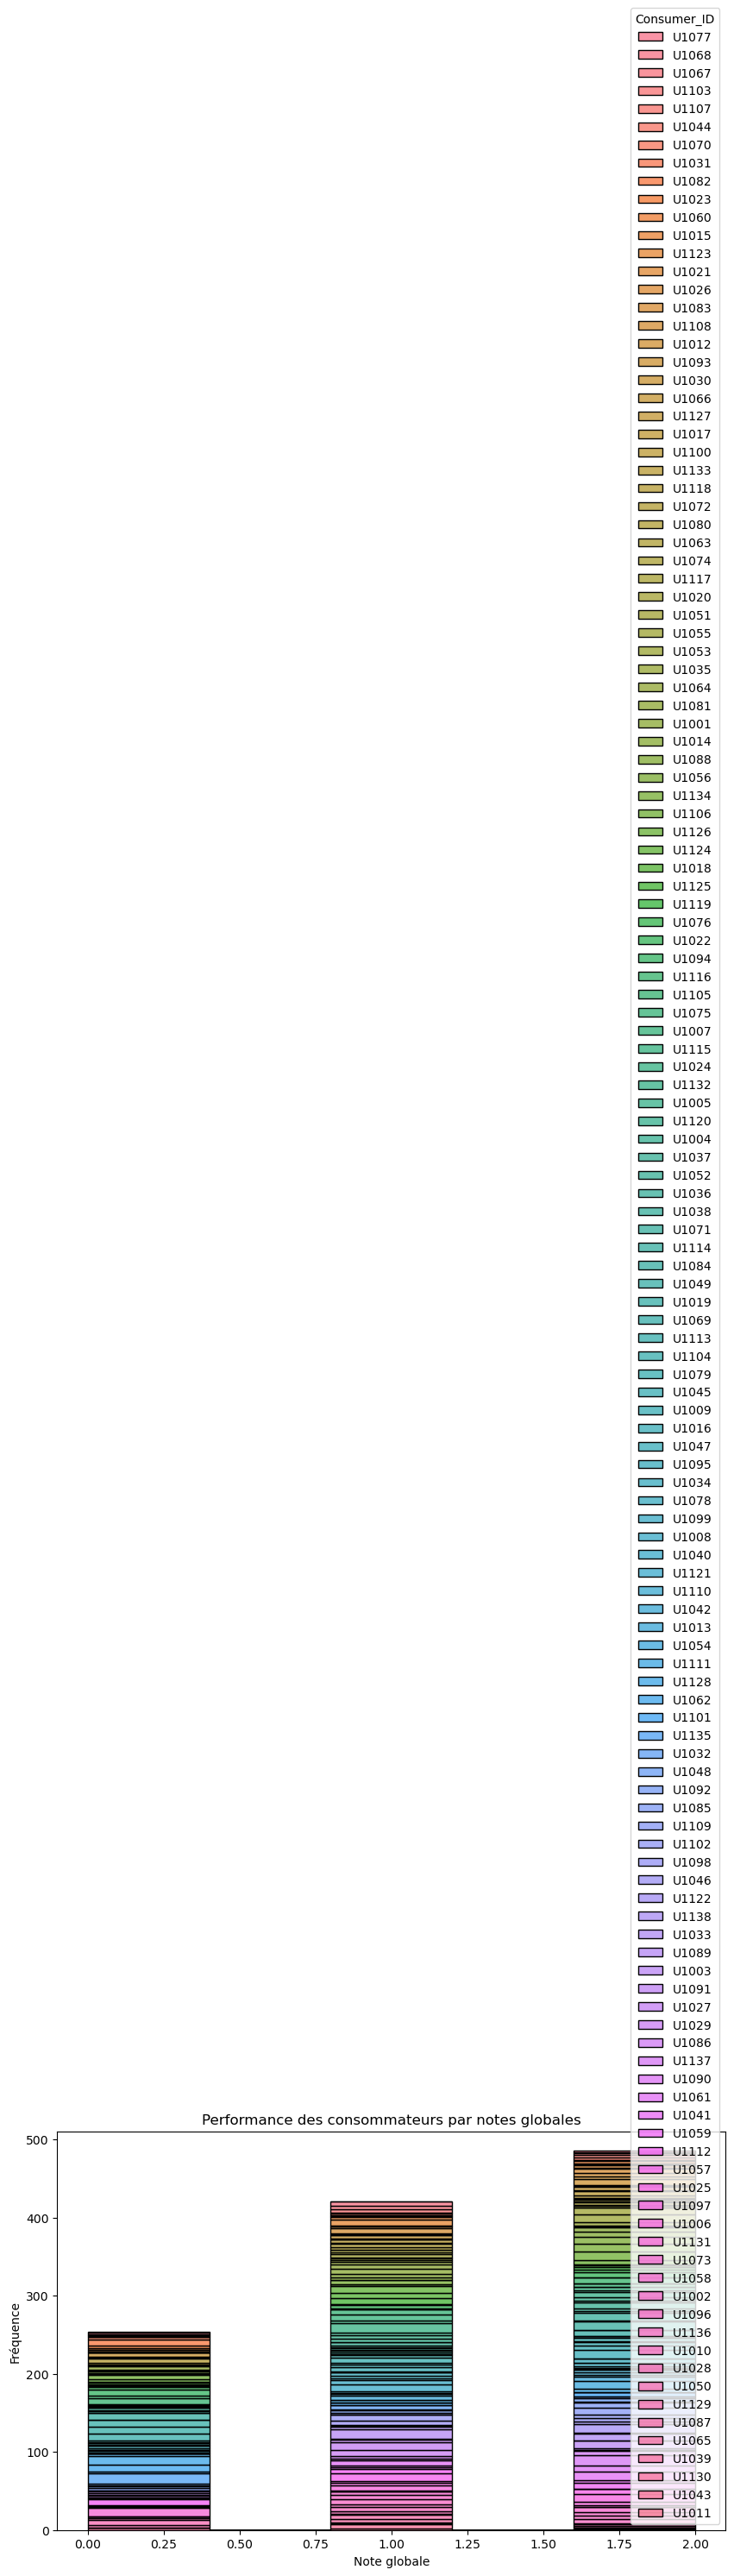

In [293]:
#visualisation des performances des consommateurs en fonction des notes globale
# Histogramme des notes globales par ID de consommateur
plt.figure(figsize=(10, 6))
sns.histplot(data=ratings, x='Overall_Rating', hue='Consumer_ID', multiple='stack', bins=5)
plt.title('Performance des consommateurs par notes globales')
plt.xlabel('Note globale')
plt.ylabel('Fréquence')
plt.show()


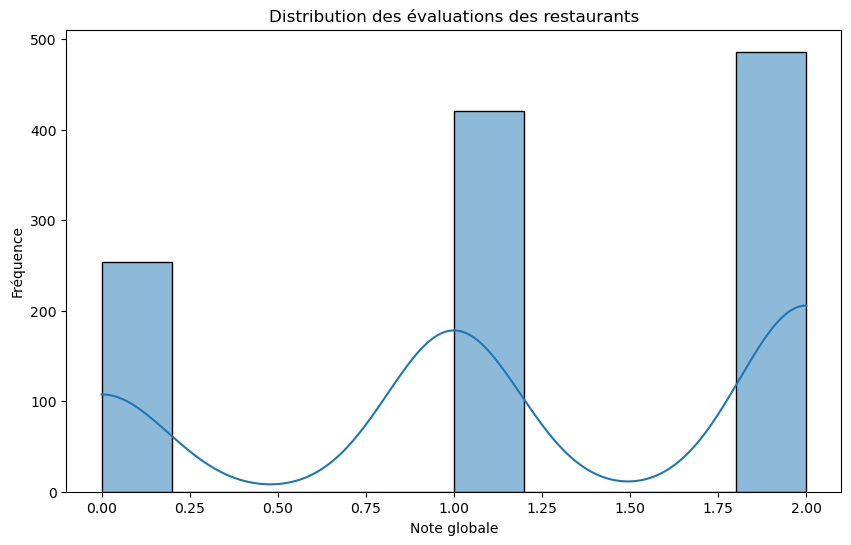

In [295]:
#visualistaion de la distrubtion des notes des restaurants 
plt.figure(figsize=(10, 6))
sns.histplot(ratings['Overall_Rating'], bins=10, kde=True)
plt.title('Distribution des évaluations des restaurants')
plt.xlabel('Note globale')
plt.ylabel('Fréquence')
plt.show()


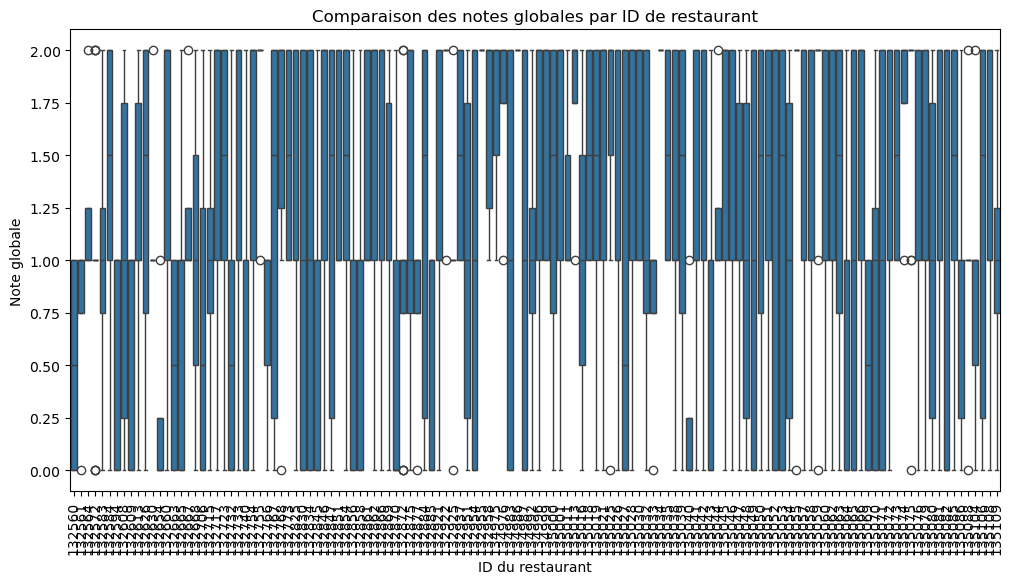

In [297]:
#comparaison des notes par ID restaurant
plt.figure(figsize=(12, 6))
sns.boxplot(x='Restaurant_ID', y='Overall_Rating', data=ratings)
plt.title('Comparaison des notes globales par ID de restaurant')
plt.xlabel('ID du restaurant')
plt.ylabel('Note globale')
plt.xticks(rotation=90)
plt.show()


Matrice de Corrélation

In [302]:
#Calcul de la matrice de Corrélation "ratings"

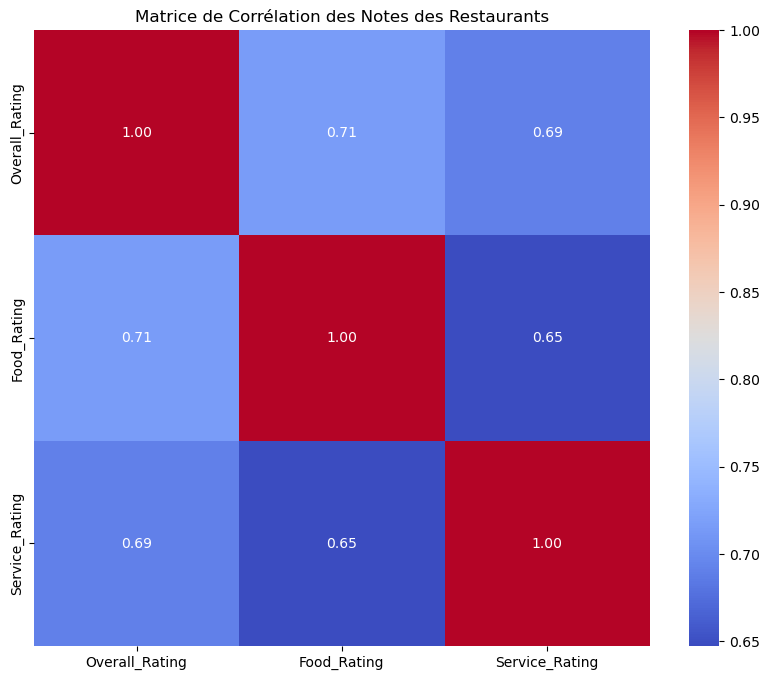

In [304]:
correlation_matrix = ratings[['Overall_Rating', 'Food_Rating', 'Service_Rating']].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation des Notes des Restaurants')
plt.show()